Scenario - 1

Import required Python libraries

In [45]:
print("Roll no - 24BAD008 ")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



Roll no - 24BAD008 


Load the student performance dataset

In [46]:
print("Roll no - 24BAD008 ")
df = pd.read_csv("StudentsPerformance.csv")
df.head()


Roll no - 24BAD008 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Perform data preprocessing and encoding of categorical features

In [52]:


print("Roll no - 24BAD008")

df = pd.read_csv("StudentsPerformance.csv")

df_encoded = pd.get_dummies(df, 
                            columns=[
                                'gender',
                                'race/ethnicity',
                                'parental level of education',
                                'lunch',
                                'test preparation course'
                            ],
                            drop_first=True)

print(df_encoded.head())
df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop("math score", axis=1)  
y = df_encoded["math score"]


Roll no - 24BAD008
   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1    

Select multiple input features and compute the target variable

In [53]:
df['FinalScore'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

X = df.drop(columns=["FinalScore","reading score","writing score"])
y = df["FinalScore"]


Handle missing values using suitable imputation


In [49]:
df.fillna(df.mean(numeric_only=True), inplace=True)


Apply feature scaling

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling successful!")

ValueError: could not convert string to float: 'female'

Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train a Multilinear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predict student performance for test data

In [ ]:
y_pred = model.predict(X_test)


Evaluate performance

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse)
print(rmse)
print(r2)


29.095169866715494
5.393993869732843
0.8804332983749564


Analyze regression coefficients

In [ ]:
# Re-do the preprocessing and split for Scenario 1 to ensure correct variables
X = df[
    [
     'parental level of education',
     'test preparation course',
    ]
]

y = df['final_score']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(
    model.coef_.reshape(-1, 1),
    index=[
        'parental level of education',
        'test preparation course',
    ],
    columns=['Coefficient']
)

print(coefficients)


                             Coefficient
parental level of education    -1.006718
test preparation course        -3.840039


Optimize the model using Ridge and Lasso

In [ ]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))

Lasso R²: 0.02995635937220653


Visualization – Predicted vs Actual

In [ ]:
y_test_plot = np.asarray(y_test).reshape(-1)
y_pred_plot = np.asarray(y_pred).reshape(-1)


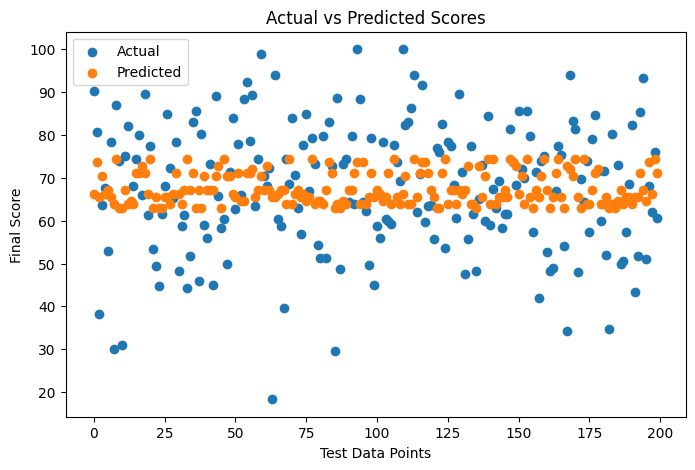

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8,5))

plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")

plt.xlabel("Test Data Points")
plt.ylabel("Final Score")
plt.title("Actual vs Predicted Scores")
plt.legend()

plt.show()


Visualization – Coefficient magnitude comparison

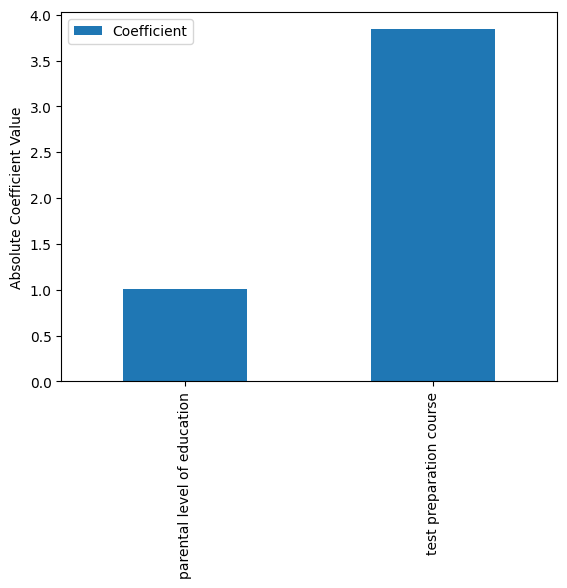

In [ ]:
coefficients_abs = coefficients.abs()
coefficients_abs.plot(kind='bar')
plt.ylabel("Absolute Coefficient Value")
plt.show()


Visualization – Residual distribution

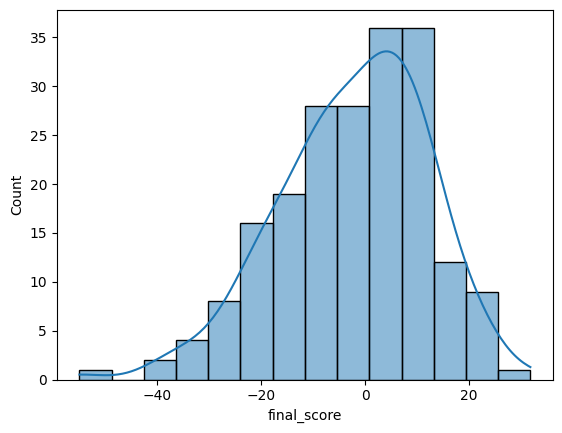

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

Scenario - 2

Load and clean the Auto MPG dataset

In [ ]:
print("Roll no - 24BAD008 ")
df = pd.read_csv("auto-mpg.csv")
df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.fillna(df.mean(numeric_only=True), inplace=True)


Roll no - 24BAD008 


Select horsepower as the independent variable

In [ ]:
X = df[['horsepower']]
y = df['mpg']


Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Generate polynomial features (degree 2, 3, 4)

In [ ]:
degrees = [2, 3, 4]


 Train, predict, and evaluate Polynomial Regression models

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

for d in degrees:
    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        scaler = StandardScaler()
        X_train_poly = scaler.fit_transform(X_train_poly)
        X_test_poly = scaler.transform(X_test_poly)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        print(d)
        print(mean_squared_error(y_test, y_pred))
        print(np.sqrt(mean_squared_error(y_test, y_pred)))
        print(r2_score(y_test, y_pred))
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    print(d)
    print(mean_squared_error(y_test, y_pred))
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(r2_score(y_test, y_pred))


2
13.760855128148345
3.709562659957147
0.7440623896917427
3
13.813374257349995
3.716634802795399
0.7430855884466044
4
14.118024022829621
3.7573959097797536
0.7374194192854792
4
14.118024022829621
3.7573959097797536
0.7374194192854792
2
13.760855128148345
3.709562659957147
0.7440623896917427
3
13.813374257349995
3.716634802795399
0.7430855884466044
4
14.118024022829621
3.7573959097797536
0.7374194192854792
4
14.118024022829621
3.7573959097797536
0.7374194192854792
2
13.760855128148345
3.709562659957147
0.7440623896917427
3
13.813374257349995
3.716634802795399
0.7430855884466044
4
14.118024022829621
3.7573959097797536
0.7374194192854792
4
14.118024022829621
3.7573959097797536
0.7374194192854792


Apply Ridge regression to control overfitting

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Training vs Testing Error

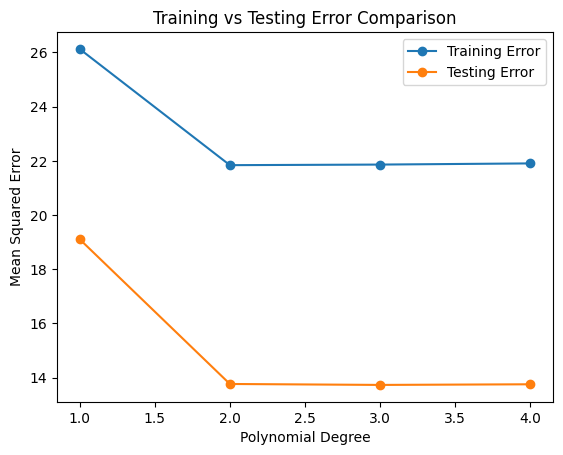

In [ ]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4]

# Split the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = ridge.predict(X_train_poly)
    y_test_pred = ridge.predict(X_test_poly)
    
    # MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting Training vs Testing Error
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='o', label="Testing Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.show()


Visualization – Polynomial curve fitting

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


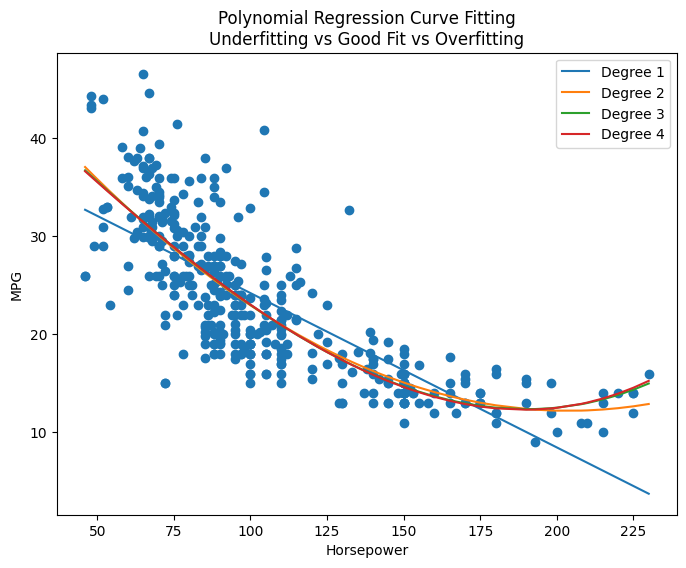

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(X, y)

for degree in [1, 2, 3, 4]:

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)

    ridge = Ridge(alpha=1.0)
    ridge.fit(X_poly_scaled, y)

    X_sorted = np.sort(X.values, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    X_poly_sorted = scaler.transform(X_poly_sorted)

    y_curve = ridge.predict(X_poly_sorted)

    plt.plot(X_sorted, y_curve, label=f"Degree {degree}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting\nUnderfitting vs Good Fit vs Overfitting")
plt.legend()
plt.show()
